# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
#%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 147911211274896906
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12948992207632594122
physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
#As woring in anaconda in local machine. Therefore no need for this

#from google.colab import drive
#drive.mount('/content/drive')

#### Change current working directory to project folder (1 mark)

In [5]:
import os
os.chdir('C:/Users/sarth/Anaconda projects/great learning/AI/CNN2/project/')

In [6]:
#Cross check step
print(os.getcwd())

C:\Users\sarth\Anaconda projects\great learning\AI\CNN2\project


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [7]:
#To see how are the files
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'About Face Detection and Recognition-1.pdf', 'Aligned Face Dataset from Pinterest.zip', 'assignment-Copy1.ipynb', 'assignment.ipynb', 'assignment2_CNN.ipynb', 'embeddings.csv', 'Face recognition - Questions - Project - CV - AIML Online - Copy.ipynb', 'images_background.zip', 'progress', 'Project Description - Face Recognition.pdf', 'vgg_face_weights.h5']


In [8]:
#TO extract data folder from zip file
from zipfile import ZipFile
with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as z:
    z.extractall()

In [9]:
#TO corss check if folder is extracted or not
print(os.listdir(os.getcwd()))
#HERE PINS folder has been extracted

['.ipynb_checkpoints', 'About Face Detection and Recognition-1.pdf', 'Aligned Face Dataset from Pinterest.zip', 'assignment-Copy1.ipynb', 'assignment.ipynb', 'assignment2_CNN.ipynb', 'embeddings.csv', 'Face recognition - Questions - Project - CV - AIML Online - Copy.ipynb', 'images_background.zip', 'PINS', 'progress', 'Project Description - Face Recognition.pdf', 'vgg_face_weights.h5']


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [10]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [11]:
#For length check to know if data s loaded properly
print(len(metadata))

10770


In [12]:
#To chect ow the data looks
print(metadata[1])

PINS\pins_Aaron Paul\Aaron Paul101_247.jpg


### Define function to load image
- Define a function to load image from the metadata

In [13]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    resized_img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
    
    
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [14]:
#Cross check step to get current working dir + PINS path in string
print(os.getcwd()+'\\PINS')

C:\Users\sarth\Anaconda projects\great learning\AI\CNN2\project\PINS


In [15]:
#Seeing all elements in the PINS folder
print(os.listdir(os.getcwd()+'\\PINS'))

['PINS', 'pins_Aaron Paul', 'pins_alexandra daddario', 'pins_Alvaro Morte', 'pins_alycia debnam carey face', 'pins_Amanda Crew', 'pins_Amaury Nolasco', 'pins_amber heard face', 'pins_Anna Gunn', 'pins_anne hathaway', 'pins_barbara palvin face', 'pins_bellamy blake face', 'pins_Benedict Cumberbatch', 'pins_Betsy Brandt', 'pins_bill gates', 'pins_Brenton Thwaites', 'pins_brie larson', 'pins_Brit Marling', 'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan', 'pins_chadwick boseman face', 'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt', 'pins_Cobie Smulders', 'pins_Danielle Panabaker', 'pins_Dave Franco', 'pins_david mazouz', 'pins_Dominic Purcell', 'pins_drake', 'pins_dua lipa face', 'pins_Dwayne Johnson', 'pins_eliza taylor', 'pins_elizabeth olsen face', 'pins_elon musk', 'pins_Emilia Clarke', 'pins_Emily Bett Rickards', 'pins_Emma Stone', 'pins_emma watson face', 'pins_gal gadot face', 'pins_grant gustin face', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pin

In [16]:
#Seeing second element in pins using [1] indexing
#Then getting full path till pins_Aaron Paul
print(os.listdir(os.getcwd()+'\\PINS')[1])
print(os.getcwd()+'\\PINS\\'+os.listdir(os.getcwd()+'\\PINS')[1])

pins_Aaron Paul
C:\Users\sarth\Anaconda projects\great learning\AI\CNN2\project\PINS\pins_Aaron Paul


In [17]:
#getting the first element inside pins_Aaron Paul
os.listdir(os.getcwd()+'\\PINS\\'+os.listdir(os.getcwd()+'\\PINS')[1])[1]

'Aaron Paul101_247.jpg'

In [18]:
#The directory is obtained by first going to current working directory then to the folder PINS then inside it I have navigated through listdir then the image name
k=load_image(os.getcwd()+'\\PINS\\'+os.listdir(os.getcwd()+'\\PINS')[1]+'\\Aaron Paul101_247.jpg')
print(k) #Printing pics

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


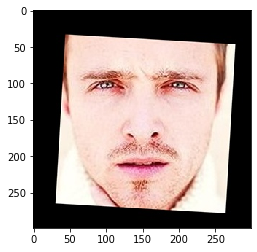

In [19]:
#plotting image
from matplotlib import pyplot
pyplot.imshow(k)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [22]:
#Loading above model and printing summary
model = vgg_face()
model.summary() # Print summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [23]:
#Loading weights
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

Using TensorFlow backend.


### Get vgg_face_descriptor

In [24]:
#Init model
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [25]:
#TO test if everything is correct
k=metadata[1].image_path()
print(k)

PINS\pins_Aaron Paul\Aaron Paul101_247.jpg


PINS\pins_Aaron Paul\Aaron Paul0_262.jpg
(224, 224, 3)
(2622,)
[ 0.03170306 -0.0150513  -0.01243403 ...  0.00043139  0.00219082
 -0.00908098]


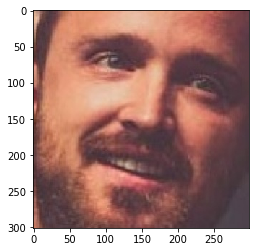

In [26]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)
print(img_path)
pyplot.imshow(img)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)
print(embedding_vector)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [27]:
#For features
#Creating array to store predictions of each image so that later it can be usied inside svm as feature 
#Array is created beause it is easier to load in svm-model
#here I first created 0's of size 10770 and 2622 as the predictions are 2622 and toal images are 10770
#Then I performed scaling and brought down all images to size 224*224 and at the end I performed predictions on each image
#then finalyy appending to embedding variable

#This is giving features for each images that was extracted using above model and weights and storing in array for putting in svm model

import numpy as np
embeddings = np.zeros((10770, 2622), dtype=float)

for i in range(0,len(metadata)):
    img_path = metadata[i].image_path()
    img = load_image(img_path)

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    #print(img.shape)
    embedding_vector2 = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector2



In [28]:
#Cross check step to see if everything is loaded properly or not
print(len(embeddings))
print(embeddings[1])
print(embeddings[-1])
print(embeddings[0])

10770
[ 0.03497702 -0.00105061 -0.01248934 ... -0.01053091  0.00179321
  0.02439153]
[ 0.01772303  0.01064052  0.01995193 ... -0.0261843   0.03288927
  0.04882649]
[ 0.03170306 -0.0150513  -0.01243403 ...  0.00043139  0.00219082
 -0.00908098]


In [29]:
#For labels
import numpy as np
labels = np.zeros((10770,), dtype=object)  #For creating 1-D array of size 10770
k,l=0,0
for i in range(0,len(metadata)):
    img_path = metadata[i].image_path()  #Getting path of each images
    k=img_path.split('\\') #Then splitting it using\\
    l=k[1].split('_')      #Then splitting it using _         
    labels[i]=l[1]         #Finally appending to labels variable


In [30]:
#Cross check step to see if everything is loaded properly or not
print(labels.shape)
print(len(labels))
print(labels)
print(type(labels))

(10770,)
10770
['Aaron Paul' 'Aaron Paul' 'Aaron Paul' ... 'zendaya' 'zendaya' 'zendaya']
<class 'numpy.ndarray'>


In [31]:
#To save prediction to csv file. This is just to save prediction to save time so that dont have to run above model again and again
from numpy import savetxt
savetxt('embeddings.csv', embeddings, delimiter=' ')

#NOTE: To use this uncomment below 2 celss

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [32]:
#To calculate distance
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

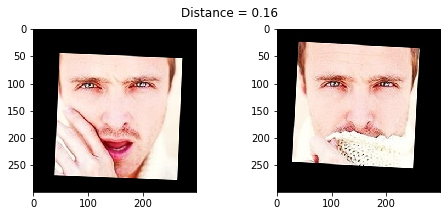

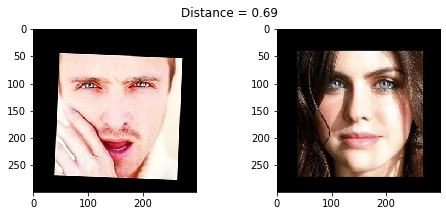

In [33]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [34]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####

In [35]:
#To check how and where it is true or false 
print(train_idx)
print(test_idx)

#Note this is just a cross check step

[False  True  True ...  True  True  True]
[ True False False ... False False False]


In [36]:
#Splitting labels and features based on above condition
#Here i am importing only those who are matching condition like every 9th element to test and remaining in train
#Also I used above cell and instructions to see how data will be 
X_train=embeddings[train_idx]
X_test=embeddings[test_idx]
y_train=labels[train_idx]
y_test=labels[test_idx]

In [37]:
#Cross check step to see data is loaded properly or not for features
#Also by looking at the shape you can see data is loaded properly 10770/9=1197 which is for test ad remailing is for train
print("Trainset shape = ",X_train.shape)
print("Testset shape = ",X_test.shape)

print("For train set = ",len(X_train))
print("For test set = ",len(X_test))
print("orignal data = ",len(embeddings))

Trainset shape =  (9573, 2622)
Testset shape =  (1197, 2622)
For train set =  9573
For test set =  1197
orignal data =  10770


In [38]:
#Cross check step to see data is loaded properly or not for labels
#Also by looking at the shape you can see data is loaded properly 10770/9=1197 which is for test ad remailing is for train
print("Trainset shape = ",y_train.shape)
print("Testset shape = ",y_test.shape)

print("For train set = ",len(y_train))
print("For test set = ",len(y_test))
print("orignal data = ",len(labels)) 

Trainset shape =  (9573,)
Testset shape =  (1197,)
For train set =  9573
For test set =  1197
orignal data =  10770


In [39]:
#This is also a cross check step to see differnt values in labels for both train and test
print("For train set")
print(np.unique(y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("For test set")
print(np.unique(y_test))

For train set
['Aaron Paul' 'Alvaro Morte' 'Amanda Crew' 'Amaury Nolasco' 'Anna Gunn'
 'Benedict Cumberbatch' 'Betsy Brandt' 'Brenton Thwaites' 'Brit Marling'
 'Bryan Cranston' 'Caity Lotz' 'Cameron Monaghan' 'Chance Perdomo'
 'Chris Evans' 'Chris Pratt' 'Cobie Smulders' 'Danielle Panabaker'
 'Dave Franco' 'Dominic Purcell' 'Dwayne Johnson' 'Emilia Clarke'
 'Emily Bett Rickards' 'Emma Stone' 'Gwyneth Paltrow' 'Henry Cavil'
 'Jason Momoa' 'Jeremy Renner' 'Jesse Eisenberg' 'Jim Parsons'
 'Jon Bernthal' 'Josh Radnor' 'Kit Harington' 'Krysten Ritter'
 'Kumail Nanjiani' 'Maisie Williams' 'Mark Ruffalo' 'Martin Starr'
 'Melissa benoit' 'Mike Colter' 'Morena Baccarin' 'Morgan Freeman'
 'Natalie Portman' 'Neil Patrick Harris' 'Paul Rudd' 'Pedro Alonso'
 'Peter Dinklage' 'RJ Mitte' 'Rami Melek' 'Robert Knepper' 'Robin Taylor'
 'Ryan Reynolds' 'Sarah Wayne Callies' 'Scarlett Johansson'
 'Sebastian Stan' 'Sophie Turner' 'Stephen Amell' 'Sundar Pichai'
 'Thomas Middleditch' 'Tom Cavanagh' 'Ursula 

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [40]:
#import lib
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #creating object of label encoder 

y_train_lb=le.fit_transform(y_train)  #Fitting abel encoder to trainset
y_test_lb=le.transform(y_test)    #Fitting abel encoder to testset
#y_test_lb=le.fit_transform(y_test)

In [41]:
#Cross-check step to see the values of both sets
print("For train set")
print(y_train_lb)

print("\n For test set")
print(y_test_lb)


For train set
[ 0  0  0 ... 99 99 99]

 For test set
[ 0  0  0 ... 99 99 99]


In [42]:
#Cross-check step to see unique values in train and test
print("For training set")
print(np.unique(y_train_lb))

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("For testing set")
print(np.unique(y_test_lb))

For training set
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For testing set
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [43]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

In [44]:
#To verify if they are scaled or not
#After scaling
print("For training set before scaling")
print(X_train)

print("#############################################################################################################")
print("#############################################################################################################")
print("#############################################################################################################")

print("For testing set before scaling")
print(X_test)

For training set before scaling
[[ 0.03497702 -0.00105061 -0.01248934 ... -0.01053091  0.00179321
   0.02439153]
 [ 0.02801893 -0.00112631 -0.01265749 ... -0.00904751 -0.00578403
   0.02125832]
 [ 0.01505303 -0.00503203 -0.00155371 ... -0.00577054 -0.00593261
   0.01585889]
 ...
 [ 0.00965871  0.0037216  -0.01345863 ... -0.01433404  0.01899945
   0.03899156]
 [ 0.0023093   0.00094765 -0.00544814 ... -0.01600496  0.01053975
   0.03683254]
 [ 0.01772303  0.01064052  0.01995193 ... -0.0261843   0.03288927
   0.04882649]]
#############################################################################################################
#############################################################################################################
#############################################################################################################
For testing set before scaling
[[ 0.03170306 -0.0150513  -0.01243403 ...  0.00043139  0.00219082
  -0.00908098]
 [ 0.02626053  0.00147695 -0.00927

In [45]:
#To verify if they are scaled or not
#After scaling
print("For training set after scaling")
print(X_train_sc)

print("#############################################################################################################")
print("#############################################################################################################")
print("#############################################################################################################")

print("For testing set after scaling")
print(X_test_sc)

For training set after scaling
[[ 2.52564357 -0.05998776 -1.46556138 ...  0.36845356 -0.39075364
   0.83708441]
 [ 1.79692976 -0.06640874 -1.48160912 ...  0.50782068 -1.10496234
   0.59647666]
 [ 0.43902318 -0.39769189 -0.42185766 ...  0.81569419 -1.11896722
   0.18184025]
 ...
 [-0.12591942  0.34479047 -1.55807069 ...  0.01114672  1.23105583
   1.9582588 ]
 [-0.89561654  0.1095042  -0.79354498 ... -0.14583734  0.43366958
   1.79246207]
 [ 0.71864919  0.93165239  1.63065312 ... -1.10219509  2.54026927
   2.71350946]]
#############################################################################################################
#############################################################################################################
#############################################################################################################
For testing set after scaling
[[ 2.18276548 -1.24752545 -1.46028191 ...  1.39837099 -0.35327658
  -1.73335883]
 [ 1.61277409  0.15439969 -1.1585775

#### As you can see everything is scaled  

In [46]:
#Cross check step to see everything is correct or not
print("Shape before scale")
print(X_train.shape)
print(X_test.shape)


print("\n Shape after scale")
print(X_train_sc.shape)
print(X_test_sc.shape)

#yes they are everything is fine

Shape before scale
(9573, 2622)
(1197, 2622)

 Shape after scale
(9573, 2622)
(1197, 2622)


### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [47]:
#Import lib
from sklearn.decomposition import PCA

In [48]:
#creating object of pca for seeing elbow graph to select nuber of fearture that can expain most variation
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
#To print variation explained by each features i.e 2622 features
print(pca.explained_variance_)

[3.56214094e+02 1.40672162e+02 1.04726979e+02 ... 4.43493087e-06
 4.29711586e-06 2.41933079e-07]


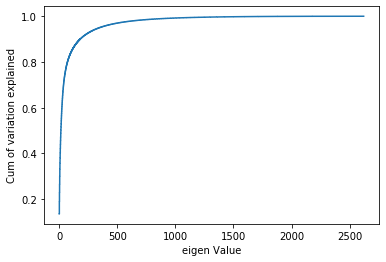

In [50]:
#Elbow method to see variance explained
plt.step(list(range(0,2622)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#Here I have to observe and select best eigen value i.e n_component which show high number of variation explained on y axis 

In [51]:
#As you can see the graph has high curve at around 500 thus shows almost high variation explained
#n_components=500 as it expained more than 90% of variance
#Then fitting data to test and train scaled set
pca = PCA(n_components=500) #inst pca with 400 component 
pca.fit(X_train_sc)
#pca.fit(X_test_sc)
print(pca.components_)
print(pca.explained_variance_ratio_)
x_train_pca = pca.transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

[[-0.02388658  0.00862043 -0.00341474 ... -0.00802623  0.02108777
   0.03879666]
 [ 0.02041368 -0.00126856  0.00789221 ... -0.02338634 -0.00439965
   0.01097761]
 [ 0.00295589  0.00191406 -0.00756269 ...  0.01113672 -0.00111495
  -0.01617018]
 ...
 [ 0.01159724 -0.01782142 -0.01077941 ...  0.03634428  0.00820761
  -0.03001482]
 [-0.01068536 -0.00121931 -0.01470472 ...  0.02254488 -0.00366687
  -0.01284769]
 [ 0.05481366  0.02245735  0.0121712  ... -0.03691795 -0.00406637
   0.02484131]]
[1.35841680e-01 5.36451057e-02 3.99374672e-02 3.68994211e-02
 3.40894602e-02 3.14059046e-02 2.57597319e-02 2.34910936e-02
 2.10050202e-02 1.92962869e-02 1.81765958e-02 1.69933406e-02
 1.65765610e-02 1.56228668e-02 1.42634190e-02 1.36878643e-02
 1.30514297e-02 1.22249254e-02 1.14920099e-02 1.13327053e-02
 1.08814252e-02 1.06313374e-02 9.66053933e-03 9.40140391e-03
 9.11942037e-03 8.78629501e-03 8.35910391e-03 7.73467421e-03
 7.67258722e-03 7.36167820e-03 7.03663728e-03 6.56914373e-03
 6.33665945e-03 6.23

In [52]:
#Cross check step For featues to see if everthing is correct
print("Before pca")
print(X_train.shape)
print(X_test.shape)

print("\n")
print("After pca")
print(x_train_pca.shape)
print(x_test_pca.shape)

#NOTE: shape of new data is 500 thus everything is correct and pca is applied properly

Before pca
(9573, 2622)
(1197, 2622)


After pca
(9573, 500)
(1197, 500)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [53]:
#Importing libs
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

In [54]:
#Creating object of svc and then fitting to pca component 
clf_pca = SVC(random_state=1)  
clf_pca.fit(x_train_pca, y_train_lb)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
#Printing accuary for all training set
print(clf_pca.score(x_train_pca, y_train_lb))

0.997388488457119


In [56]:
#Predicting for test set and then creating confusion matrix
y_pred_pca=clf_pca.predict(x_test_pca)
confusion_matrix(y_test_lb,y_pred_pca)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0,  0, 12]], dtype=int64)

In [57]:
#printing scores for both training and test set
print(clf_pca.score(x_train_pca,y_train_lb))
print(clf_pca.score(x_test_pca,y_test_lb))
#Test shows high accuracy

0.997388488457119
0.9598997493734336


In [58]:
#Printing scores and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y_test_lb,y_pred_pca)))
print(metrics.classification_report(y_test_lb,y_pred_pca))

accuracy : 0.9599
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         7
           5       1.00      0.89      0.94         9
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        14
           8       0.93      1.00      0.97        14
           9       0.90      1.00      0.95         9
          10       0.87      0.93      0.90        14
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       0.94      1.00      0.97        15
          15       1.00      1.00      1.00        15
          16       0.85      0.92      0.88        12
         

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

[63]
person idetified as :  alexandra daddario


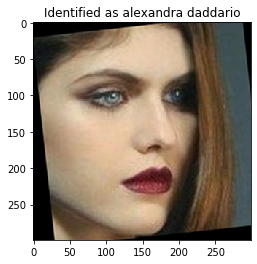

In [66]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10 #image you want to test in test set

example_image = load_image(metadata[test_idx][example_idx].image_path())  #This returns image i.e array of pixel values
img = (example_image / 255.).astype(np.float32)  #To scale pixels between 0-1
img = cv2.resize(img, dsize = (224,224))  #to resize image to 224*224

img = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]    #Getting features from the model ie. vgg_face
img=scale.transform(img.reshape(1, -1))           #reshape data for sample image. note: do this only for a sample
img = pca.transform(img)       #pca transform

example_prediction=clf_pca.predict(img)    #SVM prediction
example_identity = le.inverse_transform(example_prediction)[0]  #inverse trainform

print(example_prediction)
print("person idetified as : ",example_identity)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');


[66]
person idetified as :  anne hathaway


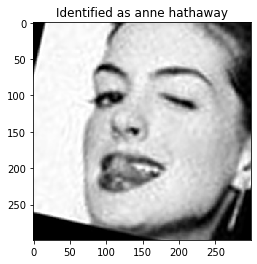

In [67]:
#Second image
warnings.filterwarnings('ignore')
example_idx = 104 #image you want to test in test set
example_image = load_image(metadata[test_idx][example_idx].image_path())  #This returns image i.e array of pixel values
img = (example_image / 255.).astype(np.float32)  #To scale pixels between 0-1
img = cv2.resize(img, dsize = (224,224))  #to resize image to 224*224
img = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]    #Getting features from the model ie. vgg_face
img=scale.transform(img.reshape(1, -1))           #reshape data for sample image. note: do this only for a sample
img = pca.transform(img)       #pca transform
example_prediction=clf_pca.predict(img)    #SVM prediction
example_identity = le.inverse_transform(example_prediction)[0]  #inverse trainform
print(example_prediction)
print("person idetified as : ",example_identity)
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

[32]
person idetified as :  Krysten Ritter


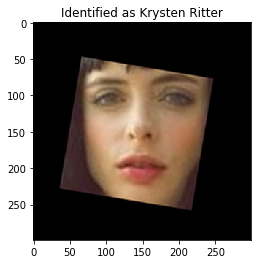

In [68]:
#Third image
warnings.filterwarnings('ignore')
example_idx = 700 #image you want to test in test set
example_image = load_image(metadata[test_idx][example_idx].image_path())  #This returns image i.e array of pixel values
img = (example_image / 255.).astype(np.float32)  #To scale pixels between 0-1
img = cv2.resize(img, dsize = (224,224))  #to resize image to 224*224
img = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]    #Getting features from the model ie. vgg_face
img=scale.transform(img.reshape(1, -1))           #reshape data for sample image. note: do this only for a sample
img = pca.transform(img)       #pca transform
example_prediction=clf_pca.predict(img)    #SVM prediction
example_identity = le.inverse_transform(example_prediction)[0]  #inverse trainform
print(example_prediction)
print("person idetified as : ",example_identity)
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');